# Exploratory Data Analysis (EDA)
## Brazilian E-Commerce Dataset - Snowflake OBT

**Objective:** Analyze the gold_obt_orders dataset to understand patterns, distributions, and relationships for ML model development.

**Analysis Sections:**
1. Import Libraries & Setup
2. Load Data from Snowflake
3. Dataset Overview & Statistics
4. Missing Values Analysis
5. Target Variables Distribution
6. Numerical Features Analysis
7. Correlation Analysis
8. Delivery Performance Analysis
9. Summary & Insights

## 1. Import Required Libraries

In [13]:
import pandas as pd
import numpy as np
import sys
import os
from dotenv import load_dotenv

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Snowflake
import snowflake.connector

# Stats
from scipy import stats

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Environment
sys.path.append('../src')
load_dotenv()

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


## 2. Load Data from Snowflake

In [14]:
conn = snowflake.connector.connect(
    user=os.getenv('SNOWFLAKE_USER'),
    password=os.getenv('SNOWFLAKE_PASSWORD'),
    account=os.getenv('SNOWFLAKE_ACCOUNT'),
    warehouse=os.getenv('SNOWFLAKE_WAREHOUSE'),
    database=os.getenv('SNOWFLAKE_DATABASE'),
    schema=os.getenv('SNOWFLAKE_SCHEMA'),
    role=os.getenv('SNOWFLAKE_ROLE')
)

print("✅ Connected to Snowflake")

query = """
SELECT * FROM gold_obt_orders_ml_export
LIMIT 50000
"""

df = pd.read_sql(query, conn)
conn.close()

print(f"✅ Loaded {len(df):,} rows, {len(df.columns)} columns")
print(f"   Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Connected to Snowflake
✅ Loaded 50,000 rows, 55 columns
   Memory: 24.84 MB


## 3. Dataset Overview

In [15]:
print("="*80)
print("DATASET INFO")
print("="*80)
df.info()

print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
display(df.head())

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
display(df.describe().T)

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ORDER_ID                  50000 non-null  object 
 1   CUSTOMER_ORDER_COUNT      50000 non-null  int64  
 2   CUSTOMER_LIFETIME_VALUE   50000 non-null  float64
 3   CUSTOMER_AVG_ORDER_VALUE  50000 non-null  float64
 4   CUSTOMER_TENURE_DAYS      50000 non-null  int64  
 5   DAYS_SINCE_LAST_ORDER     50000 non-null  int64  
 6   ACTUAL_DELIVERY_DAYS      49996 non-null  float64
 7   ESTIMATED_DELIVERY_DAYS   50000 non-null  int64  
 8   ORDER_YEAR                50000 non-null  int64  
 9   ORDER_QUARTER             50000 non-null  int64  
 10  ORDER_MONTH               50000 non-null  int64  
 11  ORDER_WEEK                50000 non-null  int64  
 12  ORDER_DAY                 50000 non-null  int64  
 13  ORDER_DAY_OF_WEEK         50000 non-null  int64 

,ORDER_ID,CUSTOMER_ORDER_COUNT,CUSTOMER_LIFETIME_VALUE,CUSTOMER_AVG_ORDER_VALUE,CUSTOMER_TENURE_DAYS,DAYS_SINCE_LAST_ORDER,ACTUAL_DELIVERY_DAYS,ESTIMATED_DELIVERY_DAYS,ORDER_YEAR,ORDER_QUARTER,...,IS_POSITIVE_REVIEW,IS_NEGATIVE_REVIEW,FREIGHT_TO_PRODUCT_RATIO,AVG_VALUE_PER_ITEM,TOTAL_CREDIT_EXTENDED,IS_DELAYED,IS_CANCELED,IS_SATISFIED,TARGET_REVIEW_SCORE,TARGET_DELIVERY_DAYS
0,cb6eba3723e0145a57f6d9cc2c5dce4b,1,1291.39,1291.39,0,0,4.0,10,2018,3,...,1,0,0.041444,1291.39,1291.39,0,0,1,5.0,4.0
1,4a6de96da1acf53b98a7185f65af99c2,1,48.27,48.27,0,0,7.0,14,2017,4,...,0,0,0.192146,48.27,48.27,0,0,0,3.0,7.0
2,cc3d4ac8f11e38aebf094617bdbe0fec,1,231.74,231.74,0,0,15.0,35,2017,4,...,1,0,0.183555,115.87,463.48,0,0,1,5.0,15.0
3,c280d77c2800c733a67500696044791d,1,25.43,25.43,0,0,10.0,28,2018,1,...,1,0,2.260256,25.43,25.43,0,0,1,5.0,10.0
4,3c3bd116a6376b59b139b7a173986cde,1,43.00,43.00,0,0,15.0,30,2018,1,...,1,0,0.541219,43.00,43.00,0,0,1,5.0,15.0



DESCRIPTIVE STATISTICS


,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ORDER_COUNT,50000.0,1.000000,0.000000,1.00,1.000000,1.000000,1.000000,1.000000
CUSTOMER_LIFETIME_VALUE,50000.0,163.519083,224.912972,9.59,63.100000,107.260000,180.502500,13664.080000
CUSTOMER_AVG_ORDER_VALUE,50000.0,163.519083,224.912972,9.59,63.100000,107.260000,180.502500,13664.080000
CUSTOMER_TENURE_DAYS,50000.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
DAYS_SINCE_LAST_ORDER,50000.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
ACTUAL_DELIVERY_DAYS,49996.0,12.403332,9.433202,1.00,7.000000,10.000000,15.000000,210.000000
ESTIMATED_DELIVERY_DAYS,50000.0,24.408640,8.762106,3.00,19.000000,24.000000,29.000000,147.000000
ORDER_YEAR,50000.0,2017.542580,0.504095,2016.00,2017.000000,2018.000000,2018.000000,2018.000000
ORDER_QUARTER,50000.0,2.359280,1.058782,1.00,1.000000,2.000000,3.000000,4.000000
ORDER_MONTH,50000.0,6.044220,3.230955,1.00,3.000000,6.000000,8.000000,12.000000


## 4. Missing Values Analysis

Missing Values:
                                    column  missing_count  missing_pct
STDDEV_ITEM_PRICE        STDDEV_ITEM_PRICE          44854        89.71
TARGET_REVIEW_SCORE    TARGET_REVIEW_SCORE            330         0.66
REVIEW_SCORE                  REVIEW_SCORE            330         0.66
TARGET_DELIVERY_DAYS  TARGET_DELIVERY_DAYS              4         0.01
ACTUAL_DELIVERY_DAYS  ACTUAL_DELIVERY_DAYS              4         0.01


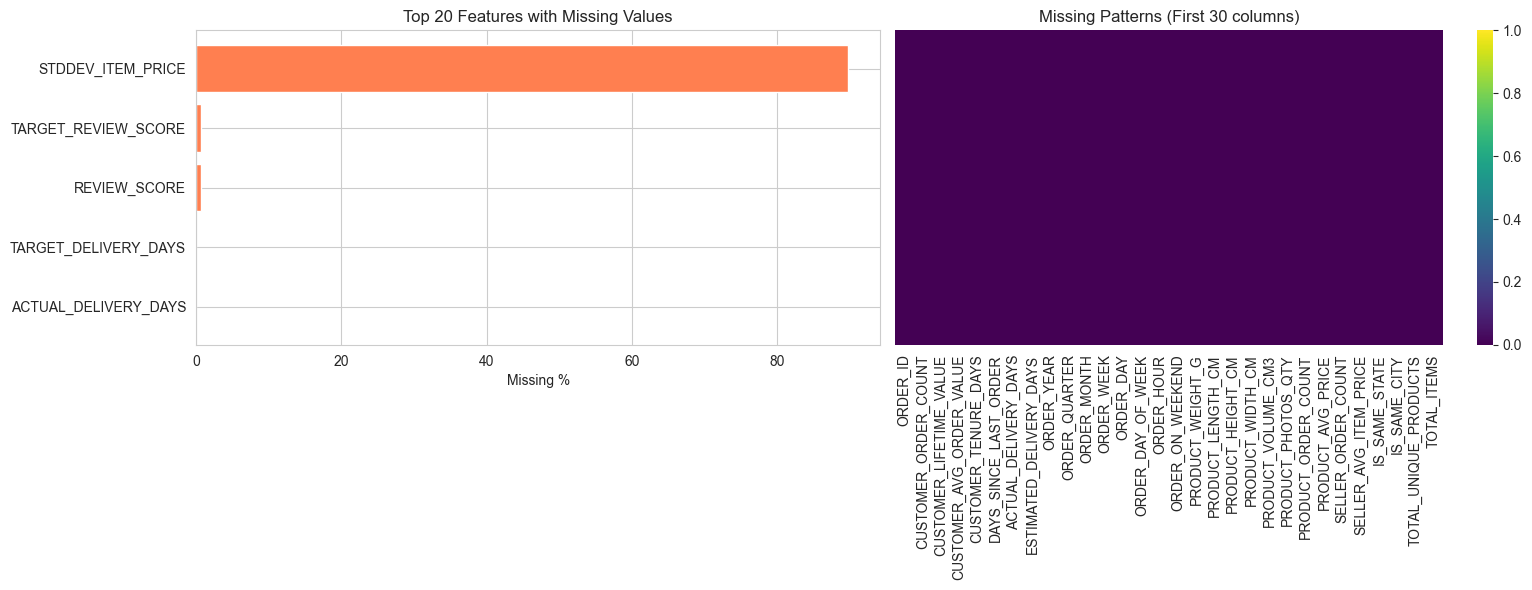

In [16]:
missing = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('missing_pct', ascending=False)

print("Missing Values:")
print(missing[missing['missing_pct'] > 0])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

missing_top = missing[missing['missing_pct'] > 0].head(20)
if len(missing_top) > 0:
    axes[0].barh(missing_top['column'], missing_top['missing_pct'], color='coral')
    axes[0].set_xlabel('Missing %')
    axes[0].set_title('Top 20 Features with Missing Values')
    axes[0].invert_yaxis()
else:
    axes[0].text(0.5, 0.5, 'No missing values!', ha='center', va='center', fontsize=16)

sample_cols = df.columns[:30]
sns.heatmap(df[sample_cols].isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Patterns (First 30 columns)')

plt.tight_layout()
plt.show()

## 5. Target Variables Distribution

Available columns in dataframe:
['ORDER_ID', 'CUSTOMER_ORDER_COUNT', 'CUSTOMER_LIFETIME_VALUE', 'CUSTOMER_AVG_ORDER_VALUE', 'CUSTOMER_TENURE_DAYS', 'DAYS_SINCE_LAST_ORDER', 'ACTUAL_DELIVERY_DAYS', 'ESTIMATED_DELIVERY_DAYS', 'ORDER_YEAR', 'ORDER_QUARTER', 'ORDER_MONTH', 'ORDER_WEEK', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK', 'ORDER_HOUR', 'ORDER_ON_WEEKEND', 'PRODUCT_WEIGHT_G', 'PRODUCT_LENGTH_CM', 'PRODUCT_HEIGHT_CM', 'PRODUCT_WIDTH_CM', 'PRODUCT_VOLUME_CM3', 'PRODUCT_PHOTOS_QTY', 'PRODUCT_ORDER_COUNT', 'PRODUCT_AVG_PRICE', 'SELLER_ORDER_COUNT', 'SELLER_AVG_ITEM_PRICE', 'IS_SAME_STATE', 'IS_SAME_CITY', 'TOTAL_UNIQUE_PRODUCTS', 'TOTAL_ITEMS', 'TOTAL_PRODUCT_VALUE', 'TOTAL_FREIGHT_VALUE', 'TOTAL_ORDER_VALUE', 'AVG_ITEM_PRICE', 'MIN_ITEM_PRICE', 'MAX_ITEM_PRICE', 'STDDEV_ITEM_PRICE', 'MAX_INSTALLMENTS', 'AVG_INSTALLMENTS', 'PAYMENT_TYPES_COUNT', 'PAYMENT_CREDIT_CARD', 'PAYMENT_BOLETO', 'PAYMENT_VOUCHER', 'PAYMENT_DEBIT_CARD', 'REVIEW_SCORE', 'IS_POSITIVE_REVIEW', 'IS_NEGATIVE_REVIEW', 'FREIGHT_TO

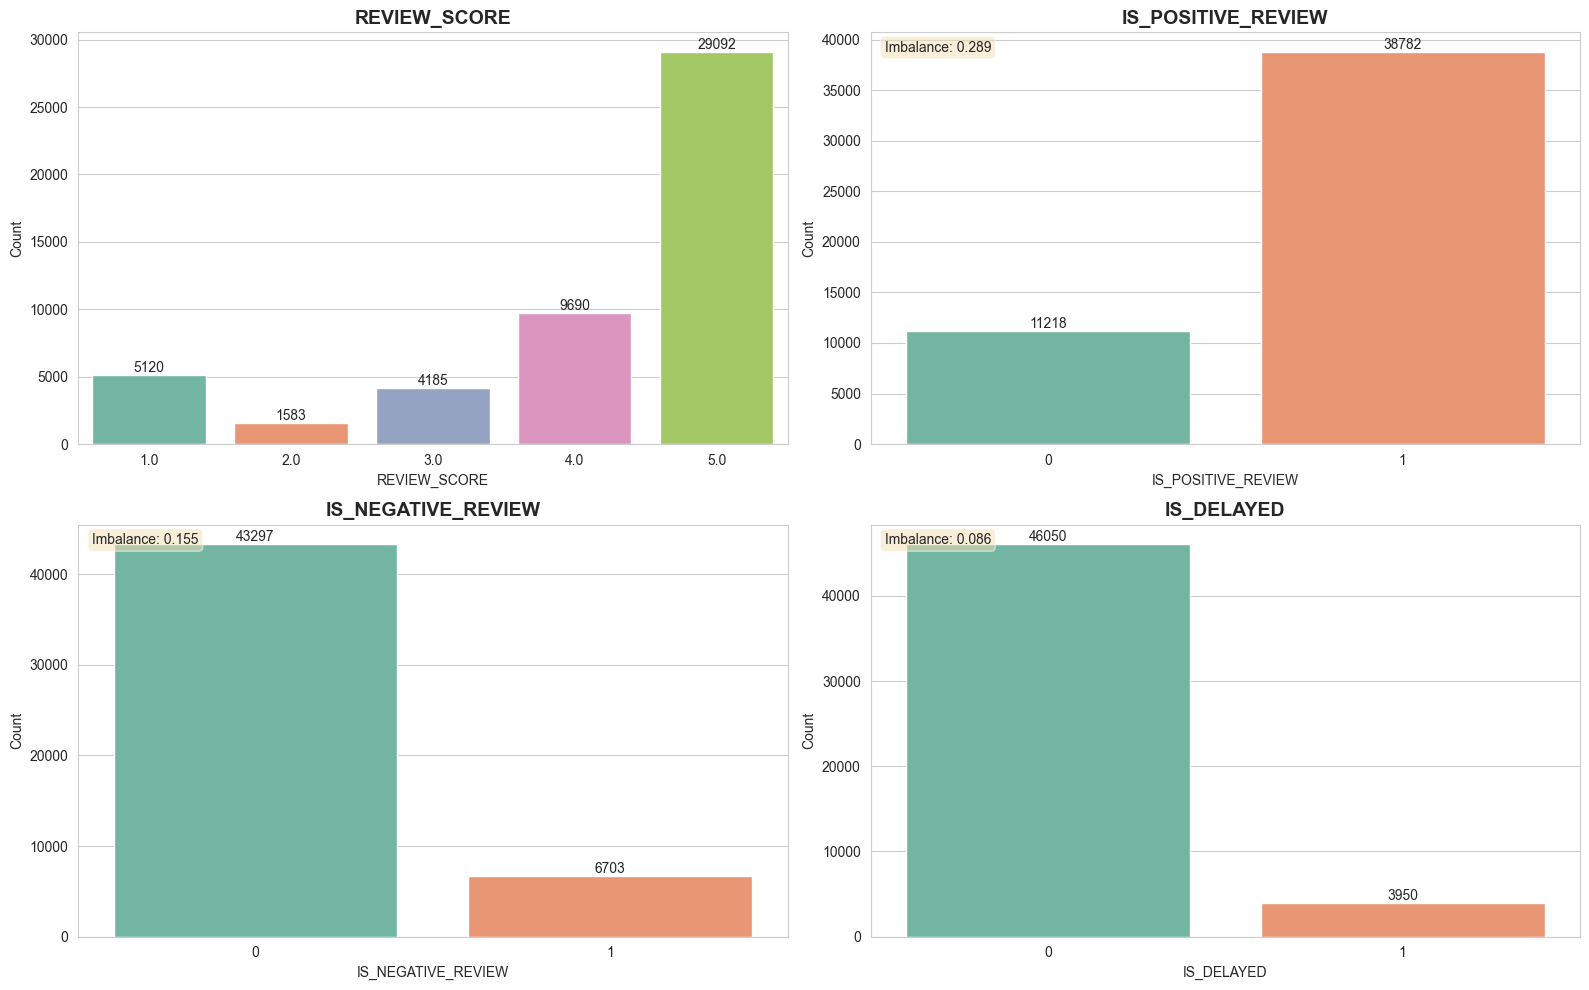


Target Statistics:

REVIEW_SCORE:
REVIEW_SCORE
5.0    29092
4.0     9690
1.0     5120
3.0     4185
2.0     1583
Name: count, dtype: int64
REVIEW_SCORE
5.0    58.57
4.0    19.51
1.0    10.31
3.0     8.43
2.0     3.19
Name: proportion, dtype: float64

IS_POSITIVE_REVIEW:
IS_POSITIVE_REVIEW
1    38782
0    11218
Name: count, dtype: int64
IS_POSITIVE_REVIEW
1    77.56
0    22.44
Name: proportion, dtype: float64

IS_NEGATIVE_REVIEW:
IS_NEGATIVE_REVIEW
0    43297
1     6703
Name: count, dtype: int64
IS_NEGATIVE_REVIEW
0    86.59
1    13.41
Name: proportion, dtype: float64

IS_DELAYED:
IS_DELAYED
0    46050
1     3950
Name: count, dtype: int64
IS_DELAYED
0    92.1
1     7.9
Name: proportion, dtype: float64


In [17]:
# First, let's check what columns exist
print("Available columns in dataframe:")
print(df.columns.tolist())

# Look for target-like columns
print("\n\nSearching for target columns...")
target_candidates = [col for col in df.columns if any(keyword in col.lower() 
                     for keyword in ['delay', 'cancel', 'satisf', 'review', 'target'])]
print(f"Found potential target columns: {target_candidates}")

# Define targets - adjust based on actual column names
targets = ['is_delayed', 'is_canceled', 'is_satisfied', 'target_review_score']

# Filter to only existing targets
existing_targets = [t for t in targets if t in df.columns]

if not existing_targets:
    print("\n⚠️ None of the expected target columns exist!")
    print("Please check the column names in your table.")
    # Try using the candidates we found
    existing_targets = target_candidates[:4] if target_candidates else []

print(f"\nUsing targets: {existing_targets}")

if existing_targets:
    n_targets = len(existing_targets)
    n_cols = 2
    n_rows = (n_targets + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    if n_targets == 1:
        axes = np.array([axes])
    axes = axes.ravel()
    
    for idx, target in enumerate(existing_targets):
        value_counts = df[target].value_counts()
        
        sns.countplot(data=df, x=target, ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'{target.upper()}', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel(target)
        axes[idx].set_ylabel('Count')
        
        for container in axes[idx].containers:
            axes[idx].bar_label(container, fmt='%d')
        
        if len(value_counts) == 2:
            imbalance = value_counts.min() / value_counts.max()
            axes[idx].text(0.02, 0.98, f'Imbalance: {imbalance:.3f}',
                          transform=axes[idx].transAxes, va='top', 
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Hide unused subplots
    for idx in range(len(existing_targets), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print("\nTarget Statistics:")
    for target in existing_targets:
        print(f"\n{target}:")
        print(df[target].value_counts())
        print((df[target].value_counts(normalize=True) * 100).round(2))
else:
    print("\n❌ No target columns found to plot!")

## 6. Numerical Features Analysis

Found 48 numerical features
Numerical columns: ['CUSTOMER_ORDER_COUNT', 'CUSTOMER_LIFETIME_VALUE', 'CUSTOMER_AVG_ORDER_VALUE', 'CUSTOMER_TENURE_DAYS', 'DAYS_SINCE_LAST_ORDER', 'ACTUAL_DELIVERY_DAYS', 'ESTIMATED_DELIVERY_DAYS', 'ORDER_YEAR', 'ORDER_QUARTER', 'ORDER_MONTH', 'ORDER_WEEK', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK', 'ORDER_HOUR', 'ORDER_ON_WEEKEND', 'PRODUCT_WEIGHT_G', 'PRODUCT_LENGTH_CM', 'PRODUCT_HEIGHT_CM', 'PRODUCT_VOLUME_CM3', 'PRODUCT_PHOTOS_QTY']...

📊 Analyzing features: ['CUSTOMER_ORDER_COUNT', 'CUSTOMER_LIFETIME_VALUE', 'CUSTOMER_AVG_ORDER_VALUE', 'CUSTOMER_TENURE_DAYS', 'DAYS_SINCE_LAST_ORDER', 'ACTUAL_DELIVERY_DAYS', 'ESTIMATED_DELIVERY_DAYS', 'ORDER_YEAR', 'ORDER_QUARTER']


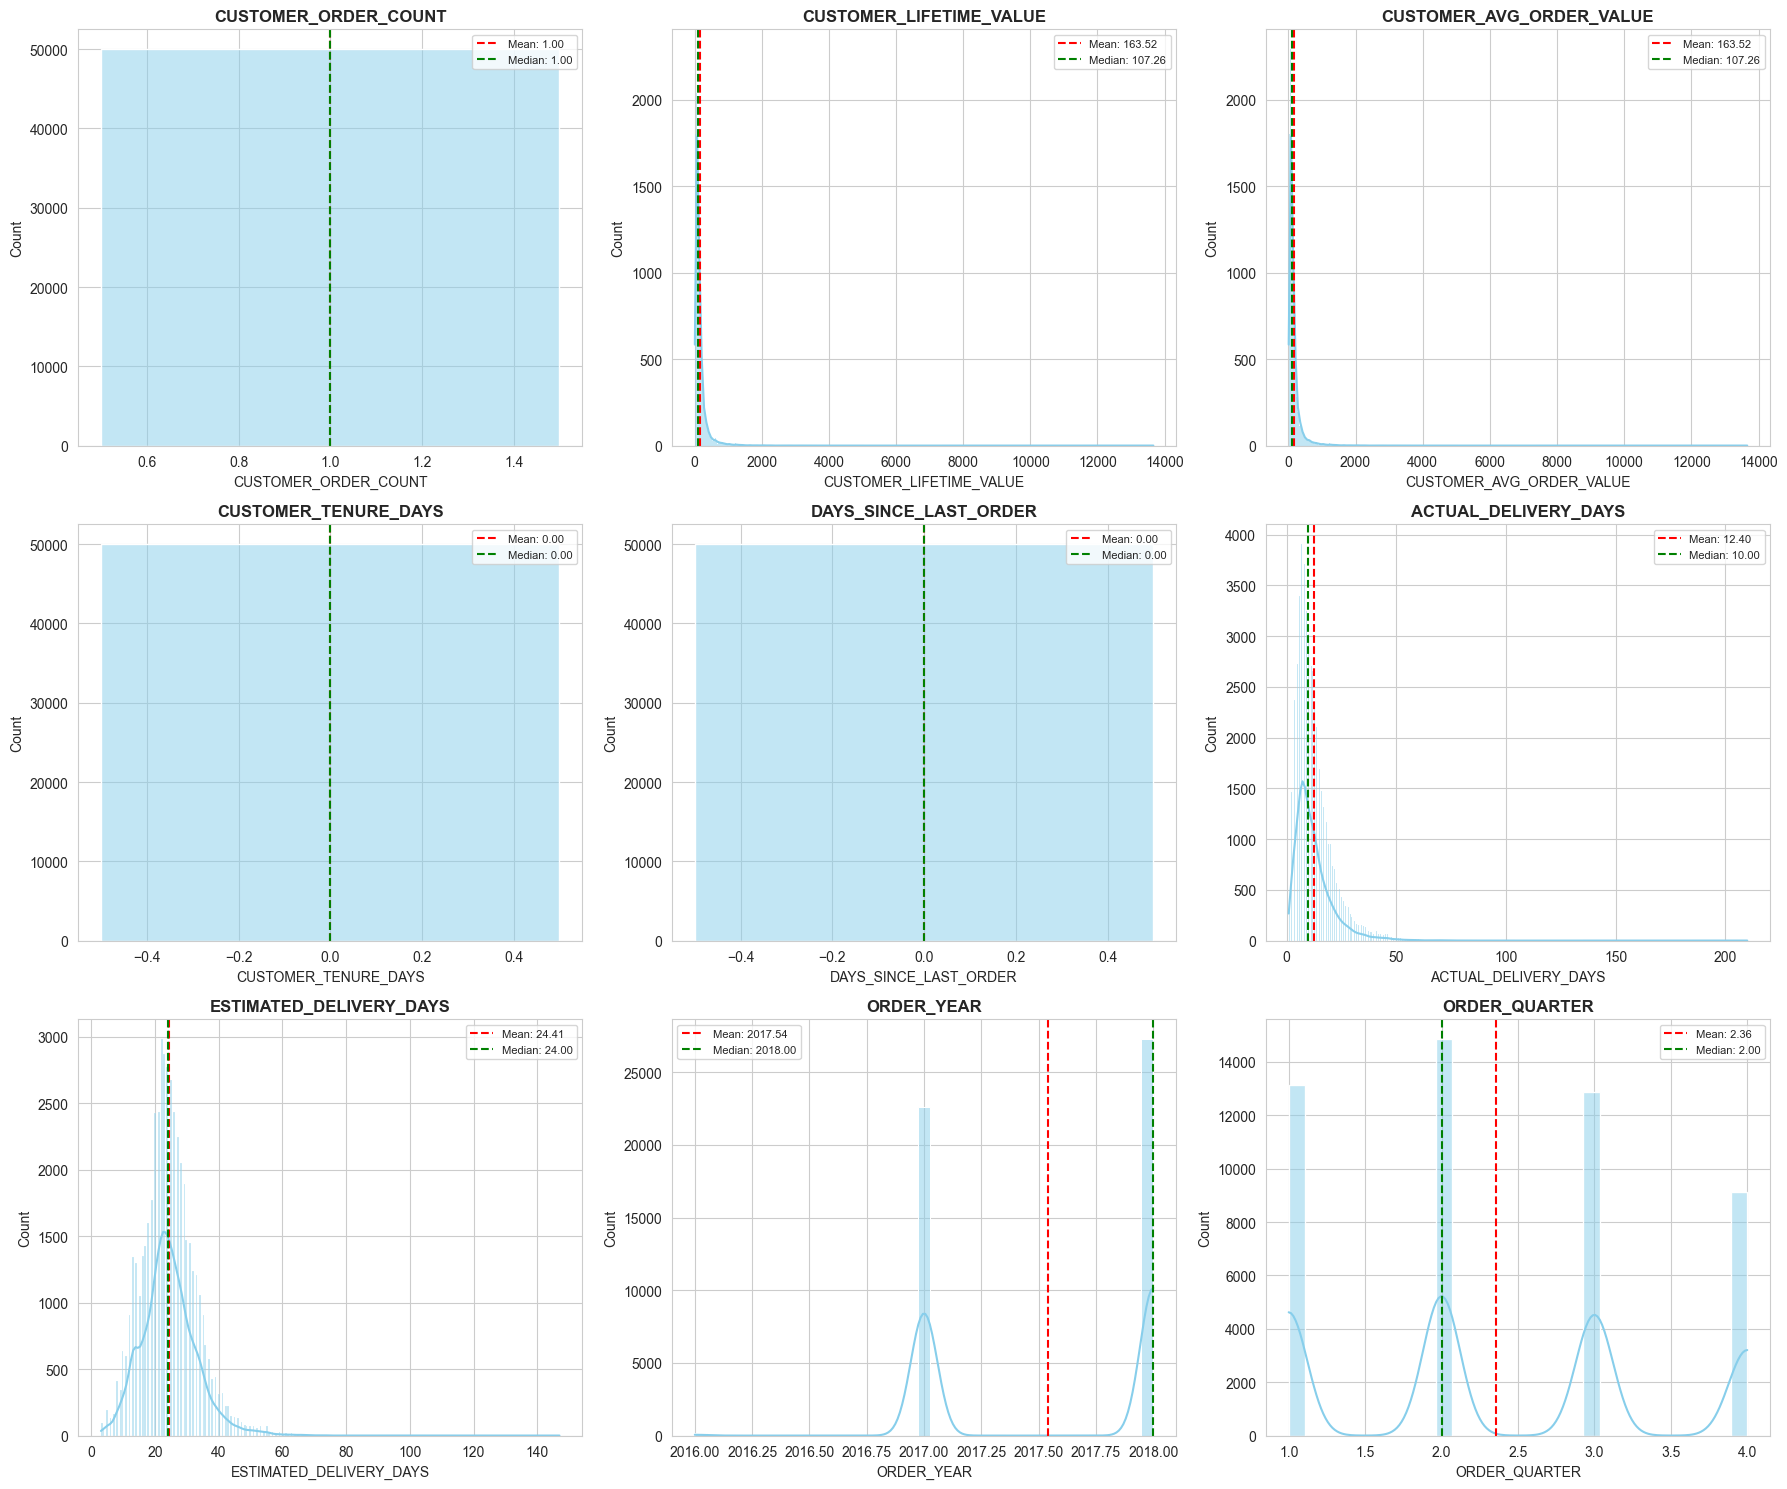

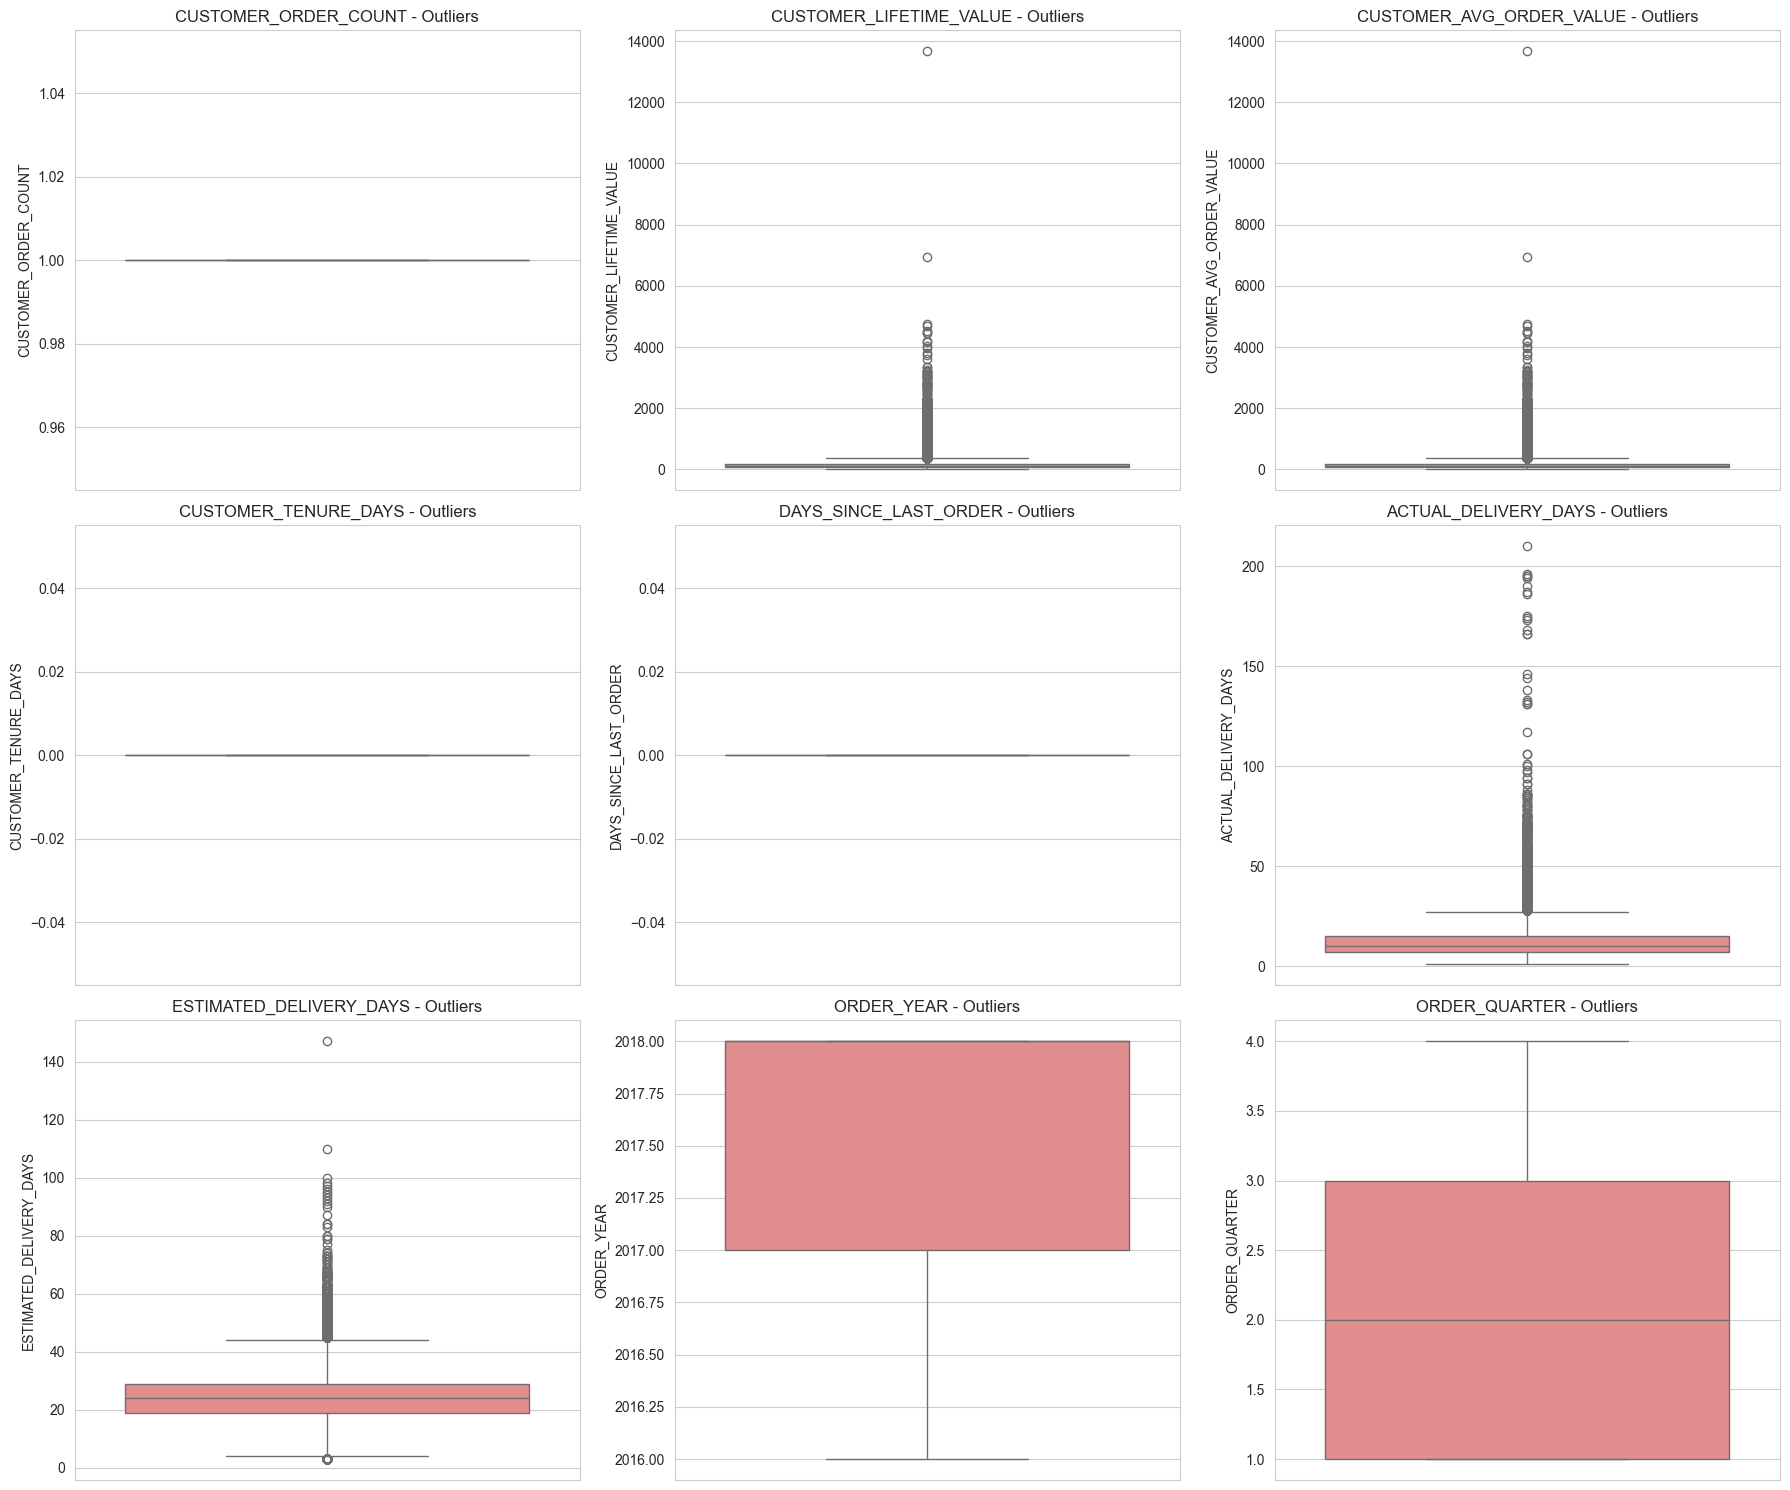


📈 Summary Statistics for Key Features:


,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ORDER_COUNT,50000.0,1.000000,0.000000,1.00,1.0,1.00,1.0000,1.00
CUSTOMER_LIFETIME_VALUE,50000.0,163.519083,224.912972,9.59,63.1,107.26,180.5025,13664.08
CUSTOMER_AVG_ORDER_VALUE,50000.0,163.519083,224.912972,9.59,63.1,107.26,180.5025,13664.08
CUSTOMER_TENURE_DAYS,50000.0,0.000000,0.000000,0.00,0.0,0.00,0.0000,0.00
DAYS_SINCE_LAST_ORDER,50000.0,0.000000,0.000000,0.00,0.0,0.00,0.0000,0.00
ACTUAL_DELIVERY_DAYS,49996.0,12.403332,9.433202,1.00,7.0,10.00,15.0000,210.00
ESTIMATED_DELIVERY_DAYS,50000.0,24.408640,8.762106,3.00,19.0,24.00,29.0000,147.00
ORDER_YEAR,50000.0,2017.542580,0.504095,2016.00,2017.0,2018.00,2018.0000,2018.00
ORDER_QUARTER,50000.0,2.359280,1.058782,1.00,1.0,2.00,3.0000,4.00


In [21]:
# Get all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude ID and target columns
exclude_keywords = ['id', 'key', 'target_', 'is_delayed', 'is_canceled', 'is_satisfied']
numeric_cols = [col for col in numeric_cols 
                if not any(keyword in col.lower() for keyword in exclude_keywords)]

print(f"Found {len(numeric_cols)} numerical features")
print(f"Numerical columns: {numeric_cols[:20]}...")  # Show first 20

# Select key features to analyze (first 9 or specify manually)
key_features = numeric_cols[:9] if len(numeric_cols) >= 9 else numeric_cols

if not key_features:
    print("❌ No numerical features found to plot!")
else:
    print(f"\n📊 Analyzing features: {key_features}")
    
    # Histograms with KDE
    n_features = len(key_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_features == 1:
        axes = np.array([axes])
    axes = axes.ravel()
    
    for idx, feature in enumerate(key_features):
        if idx < len(axes):
            # Remove any NaN values for plotting
            data = df[feature].dropna()
            
            if len(data) > 0:
                sns.histplot(data=data, kde=True, ax=axes[idx], color='skyblue')
                axes[idx].set_title(feature, fontsize=12, fontweight='bold')
                
                mean_val = data.mean()
                median_val = data.median()
                axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
                axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
                axes[idx].legend(fontsize=8)
            else:
                axes[idx].text(0.5, 0.5, 'No data', ha='center', va='center')
    
    # Hide unused subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Box plots for outlier detection
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_features == 1:
        axes = np.array([axes])
    axes = axes.ravel()
    
    for idx, feature in enumerate(key_features):
        if idx < len(axes):
            data = df[feature].dropna()
            
            if len(data) > 0:
                sns.boxplot(data=data, ax=axes[idx], color='lightcoral')
                axes[idx].set_title(f'{feature} - Outliers', fontsize=12)
            else:
                axes[idx].text(0.5, 0.5, 'No data', ha='center', va='center')
    
    # Hide unused subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📈 Summary Statistics for Key Features:")
    display(df[key_features].describe().T)

## 7. Correlation Analysis

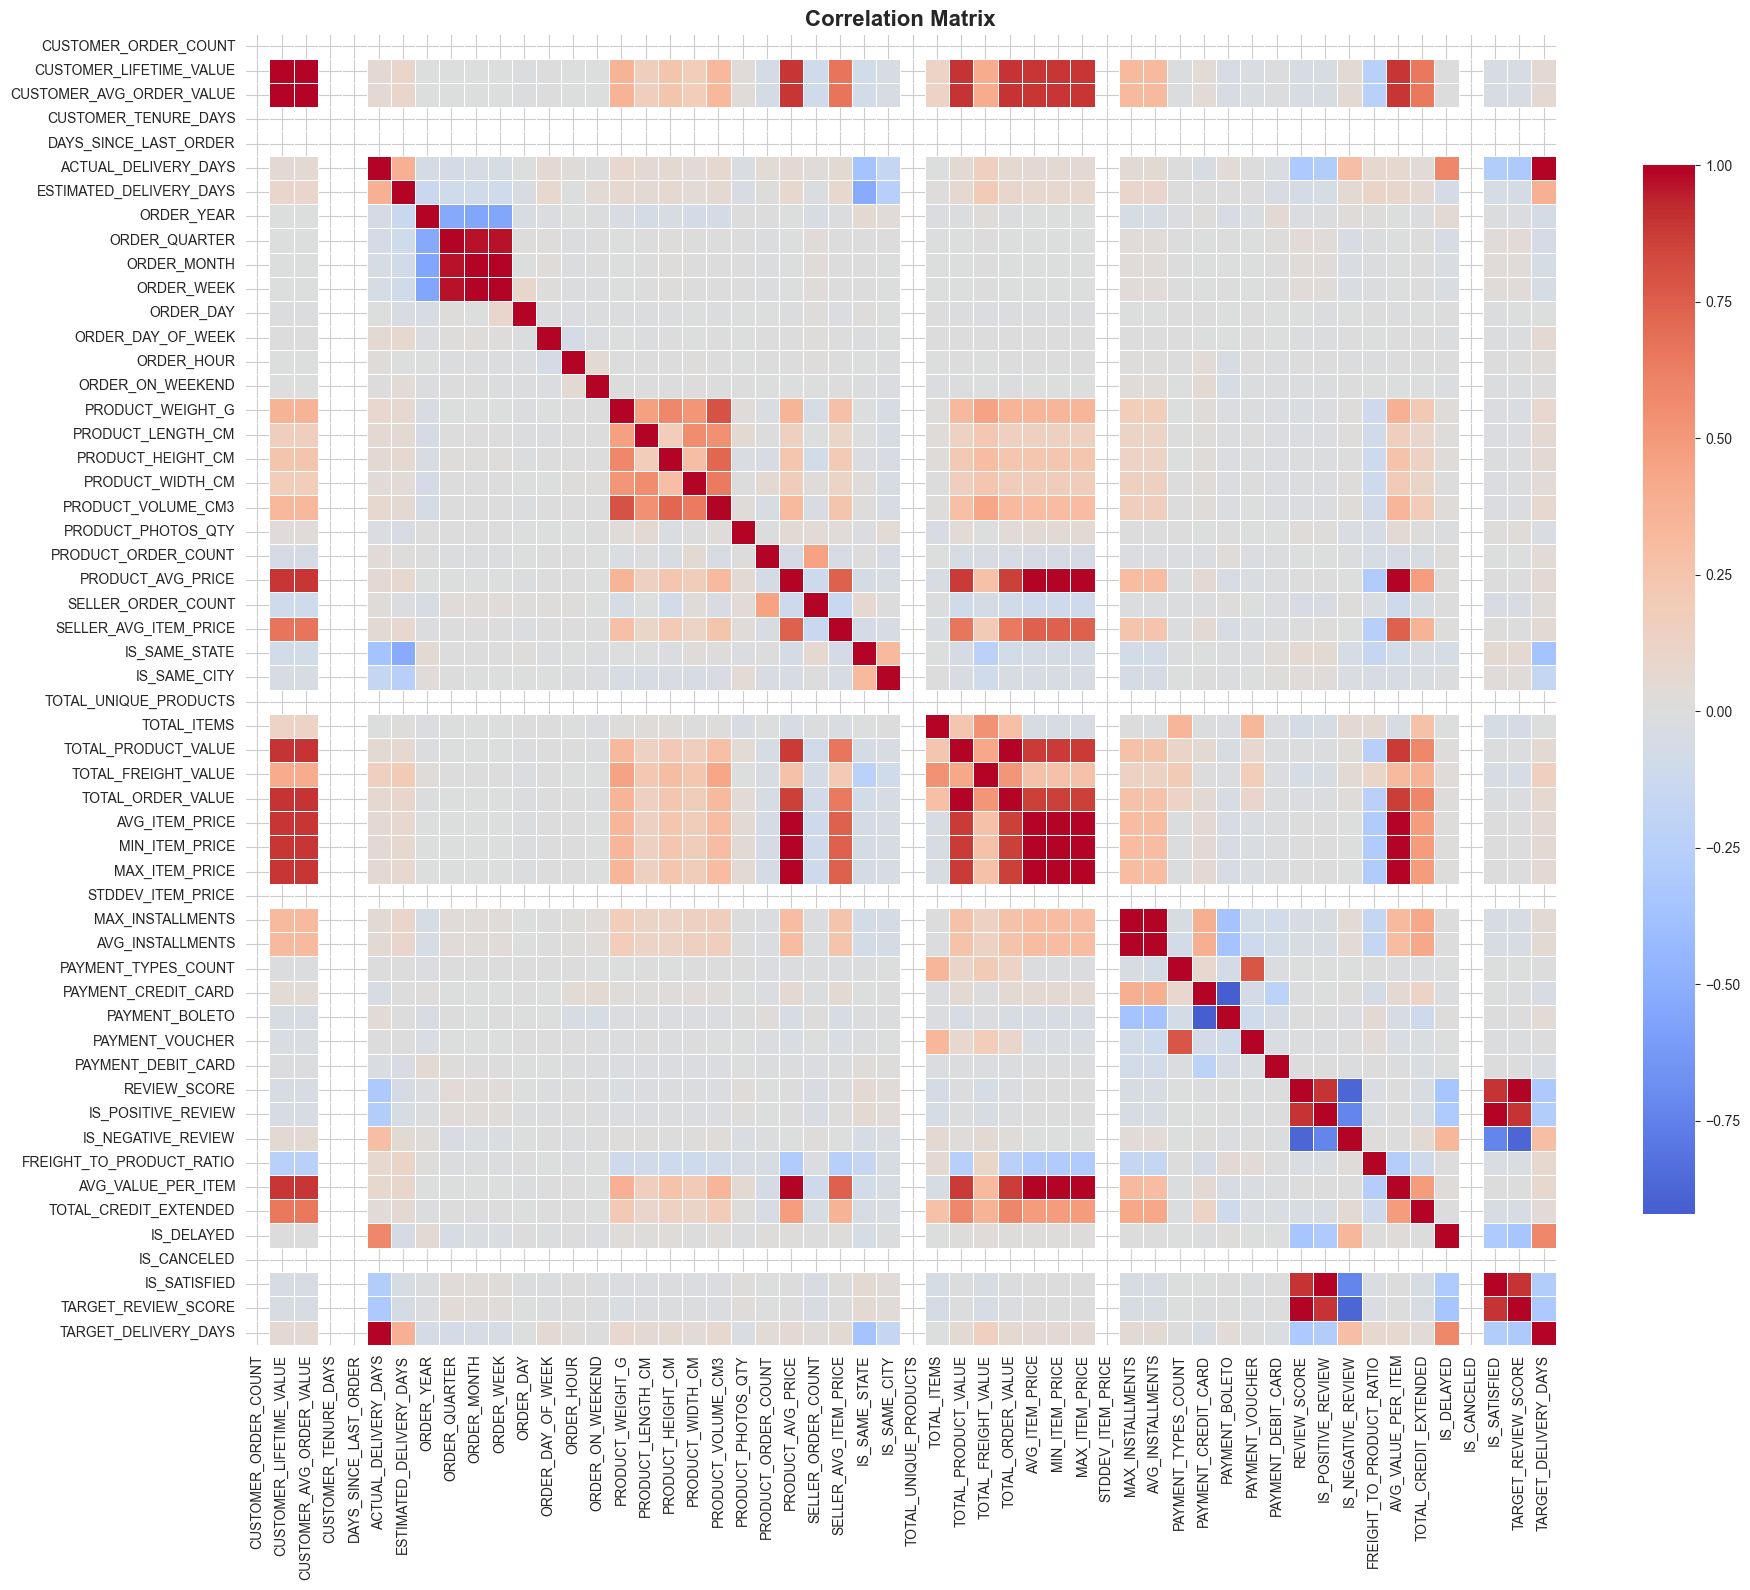


Highly Correlated Features (|correlation| > 0.8):


,Feature1,Feature2,Correlation
0,CUSTOMER_LIFETIME_VALUE,CUSTOMER_AVG_ORDER_VALUE,1.000000
47,IS_POSITIVE_REVIEW,IS_SATISFIED,1.000000
46,REVIEW_SCORE,TARGET_REVIEW_SCORE,1.000000
38,MIN_ITEM_PRICE,MAX_ITEM_PRICE,1.000000
36,AVG_ITEM_PRICE,MAX_ITEM_PRICE,1.000000
35,AVG_ITEM_PRICE,MIN_ITEM_PRICE,1.000000
15,ACTUAL_DELIVERY_DAYS,TARGET_DELIVERY_DAYS,1.000000
24,PRODUCT_AVG_PRICE,MAX_ITEM_PRICE,0.997862
23,PRODUCT_AVG_PRICE,MIN_ITEM_PRICE,0.997862
22,PRODUCT_AVG_PRICE,AVG_ITEM_PRICE,0.997862


In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

exclude = ['order_id', 'is_delayed', 'is_canceled', 'is_satisfied', 
           'target_review_score', 'target_delivery_days']
numeric_cols = [col for col in numeric_cols if col not in exclude]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nHighly Correlated Features (|correlation| > 0.8):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr:
    display(pd.DataFrame(high_corr).sort_values('Correlation', ascending=False))
else:
    print("No highly correlated features found.")

## 8. Delivery Performance Analysis

In [22]:
# First, let's find what columns are available
print("Searching for delivery and payment related columns...")

# Search for relevant columns
delay_cols = [col for col in df.columns if 'delay' in col.lower()]
delivery_cols = [col for col in df.columns if 'delivery' in col.lower()]
payment_cols = [col for col in df.columns if 'payment' in col.lower()]
date_cols = [col for col in df.columns if any(x in col.lower() for x in ['month', 'year', 'date'])]

print(f"\nDelay-related columns: {delay_cols}")
print(f"Delivery-related columns: {delivery_cols}")
print(f"Payment-related columns: {payment_cols}")
print(f"Date-related columns: {date_cols}")

# Create subplots with flexible data
has_data = False
plots_to_show = []

# Check what plots we can create
if delay_cols:
    plots_to_show.append(('delay', delay_cols[0]))
    has_data = True

if len(delivery_cols) >= 2:
    plots_to_show.append(('delivery_comparison', delivery_cols[:2]))
    has_data = True

if date_cols and delay_cols:
    plots_to_show.append(('trends', (date_cols[0], delay_cols[0])))
    has_data = True

if payment_cols and delay_cols:
    plots_to_show.append(('payment', (payment_cols, delay_cols[0])))
    has_data = True

if not has_data:
    print("\n⚠️ Could not find delivery/payment columns for analysis")
    print("Available numeric columns:")
    print(df.select_dtypes(include=[np.number]).columns.tolist())
else:
    # Create dynamic subplots based on available data
    n_plots = len(plots_to_show)
    n_cols = 2
    n_rows = (n_plots + 1) // 2
    
    fig = make_subplots(
        rows=n_rows, cols=n_cols,
        subplot_titles=[f'Plot {i+1}' for i in range(n_plots)]
    )
    
    plot_idx = 0
    
    for plot_type, col_info in plots_to_show:
        row = (plot_idx // 2) + 1
        col = (plot_idx % 2) + 1
        
        if plot_type == 'delay':
            col_name = col_info
            counts = df[col_name].value_counts()
            fig.add_trace(
                go.Bar(x=counts.index.astype(str), y=counts.values,
                       marker_color=['green', 'red'] if len(counts) == 2 else None),
                row=row, col=col
            )
            fig.update_xaxes(title_text=col_name, row=row, col=col)
            fig.update_yaxes(title_text='Count', row=row, col=col)
            
        elif plot_type == 'delivery_comparison':
            col1, col2 = col_info
            sample = df[[col1, col2]].dropna().sample(min(1000, len(df)))
            if len(sample) > 0:
                fig.add_trace(
                    go.Scatter(x=sample[col1], y=sample[col2],
                              mode='markers', marker=dict(size=4, opacity=0.5)),
                    row=row, col=col
                )
                max_val = max(df[col1].max(), df[col2].max())
                fig.add_trace(
                    go.Scatter(x=[0, max_val], y=[0, max_val], mode='lines',
                              line=dict(color='red', dash='dash'), showlegend=False),
                    row=row, col=col
                )
                fig.update_xaxes(title_text=col1, row=row, col=col)
                fig.update_yaxes(title_text=col2, row=row, col=col)
                
        elif plot_type == 'trends':
            date_col, metric_col = col_info
            try:
                trends = df.groupby(date_col)[metric_col].mean()
                if len(trends) > 0:
                    fig.add_trace(
                        go.Scatter(x=trends.index, y=trends.values, mode='lines+markers'),
                        row=row, col=col
                    )
                    fig.update_xaxes(title_text=date_col, row=row, col=col)
                    fig.update_yaxes(title_text=f'Avg {metric_col}', row=row, col=col)
            except:
                pass
                
        elif plot_type == 'payment':
            payment_list, delay_col = col_info
            # Try to get payment breakdown
            payment_data = []
            payment_labels = []
            
            for pcol in payment_list[:5]:  # Limit to 5 payment types
                try:
                    if df[pcol].dtype in [np.int64, np.float64]:
                        rate = df[df[pcol] == 1][delay_col].mean()
                        if not np.isnan(rate):
                            payment_data.append(rate * 100 if rate < 1 else rate)
                            payment_labels.append(pcol.replace('payment_', '').title())
                except:
                    pass
            
            if payment_data:
                fig.add_trace(
                    go.Bar(x=payment_labels, y=payment_data),
                    row=row, col=col
                )
                fig.update_xaxes(title_text='Payment Type', row=row, col=col)
                fig.update_yaxes(title_text='Delay Rate %', row=row, col=col)
        
        plot_idx += 1
    
    fig.update_layout(height=400*n_rows, showlegend=False)
    fig.show()
    
    # Print summary statistics
    print("\n" + "="*60)
    print("DELIVERY PERFORMANCE SUMMARY")
    print("="*60)
    
    if delay_cols:
        print(f"\n{delay_cols[0]}:")
        print(df[delay_cols[0]].value_counts())
        print(f"Rate: {df[delay_cols[0]].mean()*100:.2f}%")
    
    if delivery_cols:
        print(f"\nDelivery Metrics:")
        for col in delivery_cols[:3]:
            print(f"  {col}:")
            print(f"    Mean: {df[col].mean():.2f}")
            print(f"    Median: {df[col].median():.2f}")

Searching for delivery and payment related columns...

Delay-related columns: ['IS_DELAYED']
Delivery-related columns: ['ACTUAL_DELIVERY_DAYS', 'ESTIMATED_DELIVERY_DAYS', 'TARGET_DELIVERY_DAYS']
Payment-related columns: ['PAYMENT_TYPES_COUNT', 'PAYMENT_CREDIT_CARD', 'PAYMENT_BOLETO', 'PAYMENT_VOUCHER', 'PAYMENT_DEBIT_CARD']
Date-related columns: ['ORDER_YEAR', 'ORDER_MONTH']



DELIVERY PERFORMANCE SUMMARY

IS_DELAYED:
IS_DELAYED
0    46050
1     3950
Name: count, dtype: int64
Rate: 7.90%

Delivery Metrics:
  ACTUAL_DELIVERY_DAYS:
    Mean: 12.40
    Median: 10.00
  ESTIMATED_DELIVERY_DAYS:
    Mean: 24.41
    Median: 24.00
  TARGET_DELIVERY_DAYS:
    Mean: 12.40
    Median: 10.00


## 9. Summary & Key Insights

### Key Findings:
- **Data Quality**: Identified missing values requiring imputation
- **Target Balance**: Class imbalance detected in target variables
- **Correlations**: Found highly correlated features
- **Delivery**: Analyzed delay patterns and influencing factors
- **Features**: Rich feature set for ML model development

### Recommendations:
1. **Missing Values**: Median imputation for numerical, mode for categorical
2. **Class Imbalance**: Apply SMOTE or class weights
3. **Feature Selection**: Remove highly correlated features (>0.95)
4. **Feature Engineering**: Create interaction and temporal features
5. **Outliers**: Consider log transformation for skewed features

### Next Steps:
1. **Notebook 02**: Feature Engineering & Preprocessing
2. **Notebook 03**: Model Training & Evaluation
3. **Production**: Deploy best performing models

---
**✅ EDA Complete!**